In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
df=sns.load_dataset("tips")

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
np.mean(df["total_bill"])

19.78594262295082

In [5]:
np.median(df["total_bill"])

17.795

In [6]:
statistics.mode(df["total_bill"])

13.42

In [7]:
np.max(df["total_bill"])

50.81

<Axes: ylabel='total_bill'>

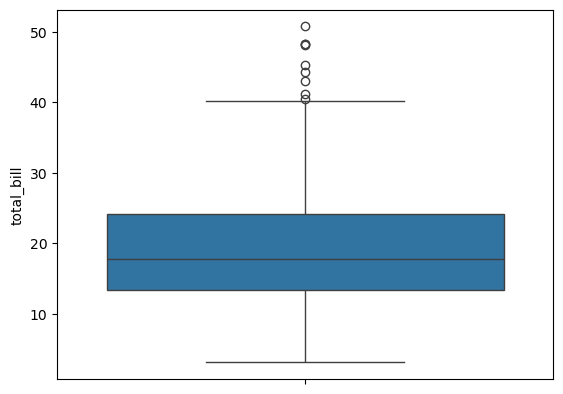

In [8]:
sns.boxplot(df["total_bill"])

<Axes: xlabel='total_bill', ylabel='Count'>

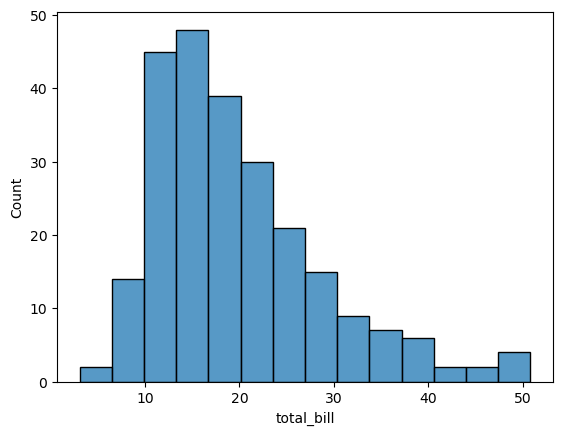

In [9]:
sns.histplot(df["total_bill"])

<Axes: xlabel='total_bill', ylabel='Count'>

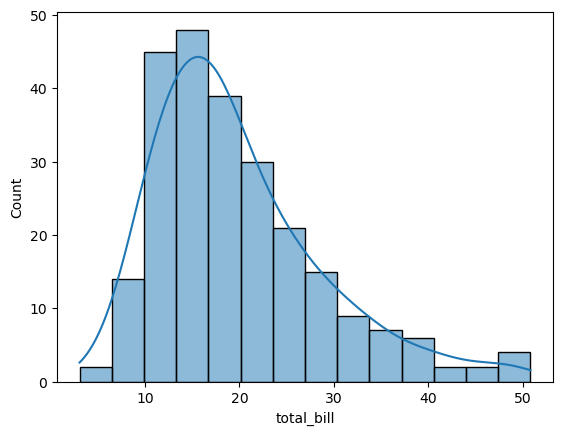

In [10]:
sns.histplot(df["total_bill"],kde=True) # right skewed

<Axes: xlabel='smoker', ylabel='count'>

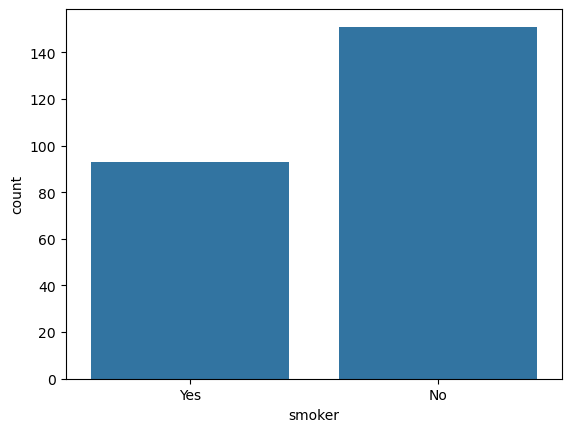

In [11]:
sns.countplot(x=df["smoker"])

In [12]:
np.percentile(df["total_bill"],[17,99])

array([12.0703, 48.227 ])

In [14]:
df1=[11,10,12,23,23,21,11,15,16,19,17,18,10,21,23,15,16,17,14,20,11,17,16,1,108,-23,-24,112,14]

<Axes: >

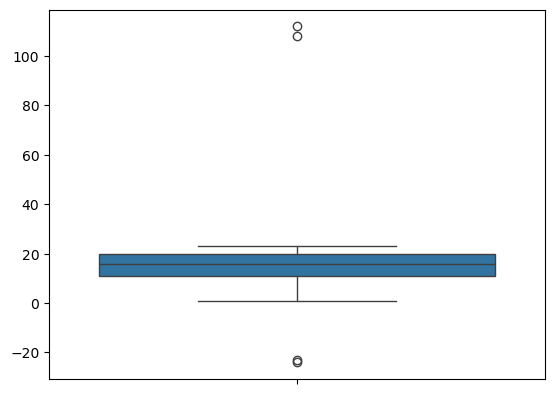

In [15]:
sns.boxplot(
    df1
)

In [17]:
# outliers using z-score
#can't detect negative outliers even though absolute is used

def detect_outliers(data):
    outliers = []  
    threshold = 3  
    
    mean = np.mean(data)  
    std = np.std(data)  
    
    for i in data:
        z_score = (i - mean) / std  
        if abs(z_score) > threshold:  
            outliers.append(i)
    
    return outliers
print(detect_outliers(df1))

            
    
    
    

[108, 112]


In [11]:
#IQR

# 1) sort the data
# 2) calculate q1 and q3
# 3) now calculate IQR(qr-q1)
# 4) Find the upper fence (q1 - 1.5(iqr))
# 5) Find the lower fence(q3 + 1.5(iqr))

df2=sorted(df1)
q1,q3=np.percentile(df2,[25,75])
print("q1,q3=", q1,q3)
iqr=q3-q1
print("iqr",iqr)
lower_fence=q1 - (1.5*(iqr))
higher_fence=q3 + (1.5*(iqr))
print("lower fence : ",lower_fence)
print("higher fence: ",higher_fence)
print(np.median(df2))

q1,q3= 11.0 20.0
iqr 9.0
lower fence :  -2.5
higher fence:  33.5
16.0


In [13]:
import numpy as np

# Sample data
data = np.array([10, 12, 15, 18, 22, 25, 28, 35, 40, 50, 100, 150, 200, 500,-100])  # Includes outliers

# Step 1: Compute the five-number summary
minimum = np.min(data)
q1 = np.percentile(data, 25)  # First Quartile (Q1)
median = np.median(data)      # Median (Q2)
q3 = np.percentile(data, 75)  # Third Quartile (Q3)
maximum = np.max(data)

print(f"Minimum: {minimum}")
print(f"Q1 (25th percentile): {q1}")
print(f"Median (50th percentile): {median}")
print(f"Q3 (75th percentile): {q3}")
print(f"Maximum: {maximum}")

# Step 2: Compute Interquartile Range (IQR)
iqr = q3 - q1
print(f"IQR (Q3 - Q1): {iqr}")

# Step 3: Compute Lower and Upper Fences
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")

# Step 4: Detect Outliers
outliers = data[(data < lower_fence) | (data > upper_fence)]
print(f"Outliers: {outliers}")


Minimum: -100
Q1 (25th percentile): 16.5
Median (50th percentile): 28.0
Q3 (75th percentile): 75.0
Maximum: 500
IQR (Q3 - Q1): 58.5
Lower Fence: -71.25
Upper Fence: 162.75
Outliers: [ 200  500 -100]
